<a href="https://colab.research.google.com/github/sujal003-hue/Upgrade-Capstone-Project/blob/main/Boston_housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# **Loading Our Dataset**

In [ ]:
data =pd.read_csv("/content/HousingData.csv")

# **Display Top 5 Rows of the Dataset**

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# **Display Last 5 Rows of the Dataset**

In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


# **Get Information About Our Dataset Like Number of Rows, Columns, Datatype of Each Column And Memory Requirement**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# **Check the Name of Each Column in the Dataset**

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# **Finding Shape of the Dataset (Number of Rows and Columns)**

In [ ]:
data.shape

(394, 14)

# **Statistical Measure of the Dataset**

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Check the Number of Null Values in the Dataset**

In [ ]:
data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


# **Drop the Null Values from the Dataset**

In [ ]:
data.dropna(inplace=True)

## **Again checking the null values (but this time there is no null value can be seen in the dataset)**

In [ ]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# **Exploratory Data Analysis**

# **Analysing the Correlated Features**

In [ ]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


# **Data Visualization of the Dataset**

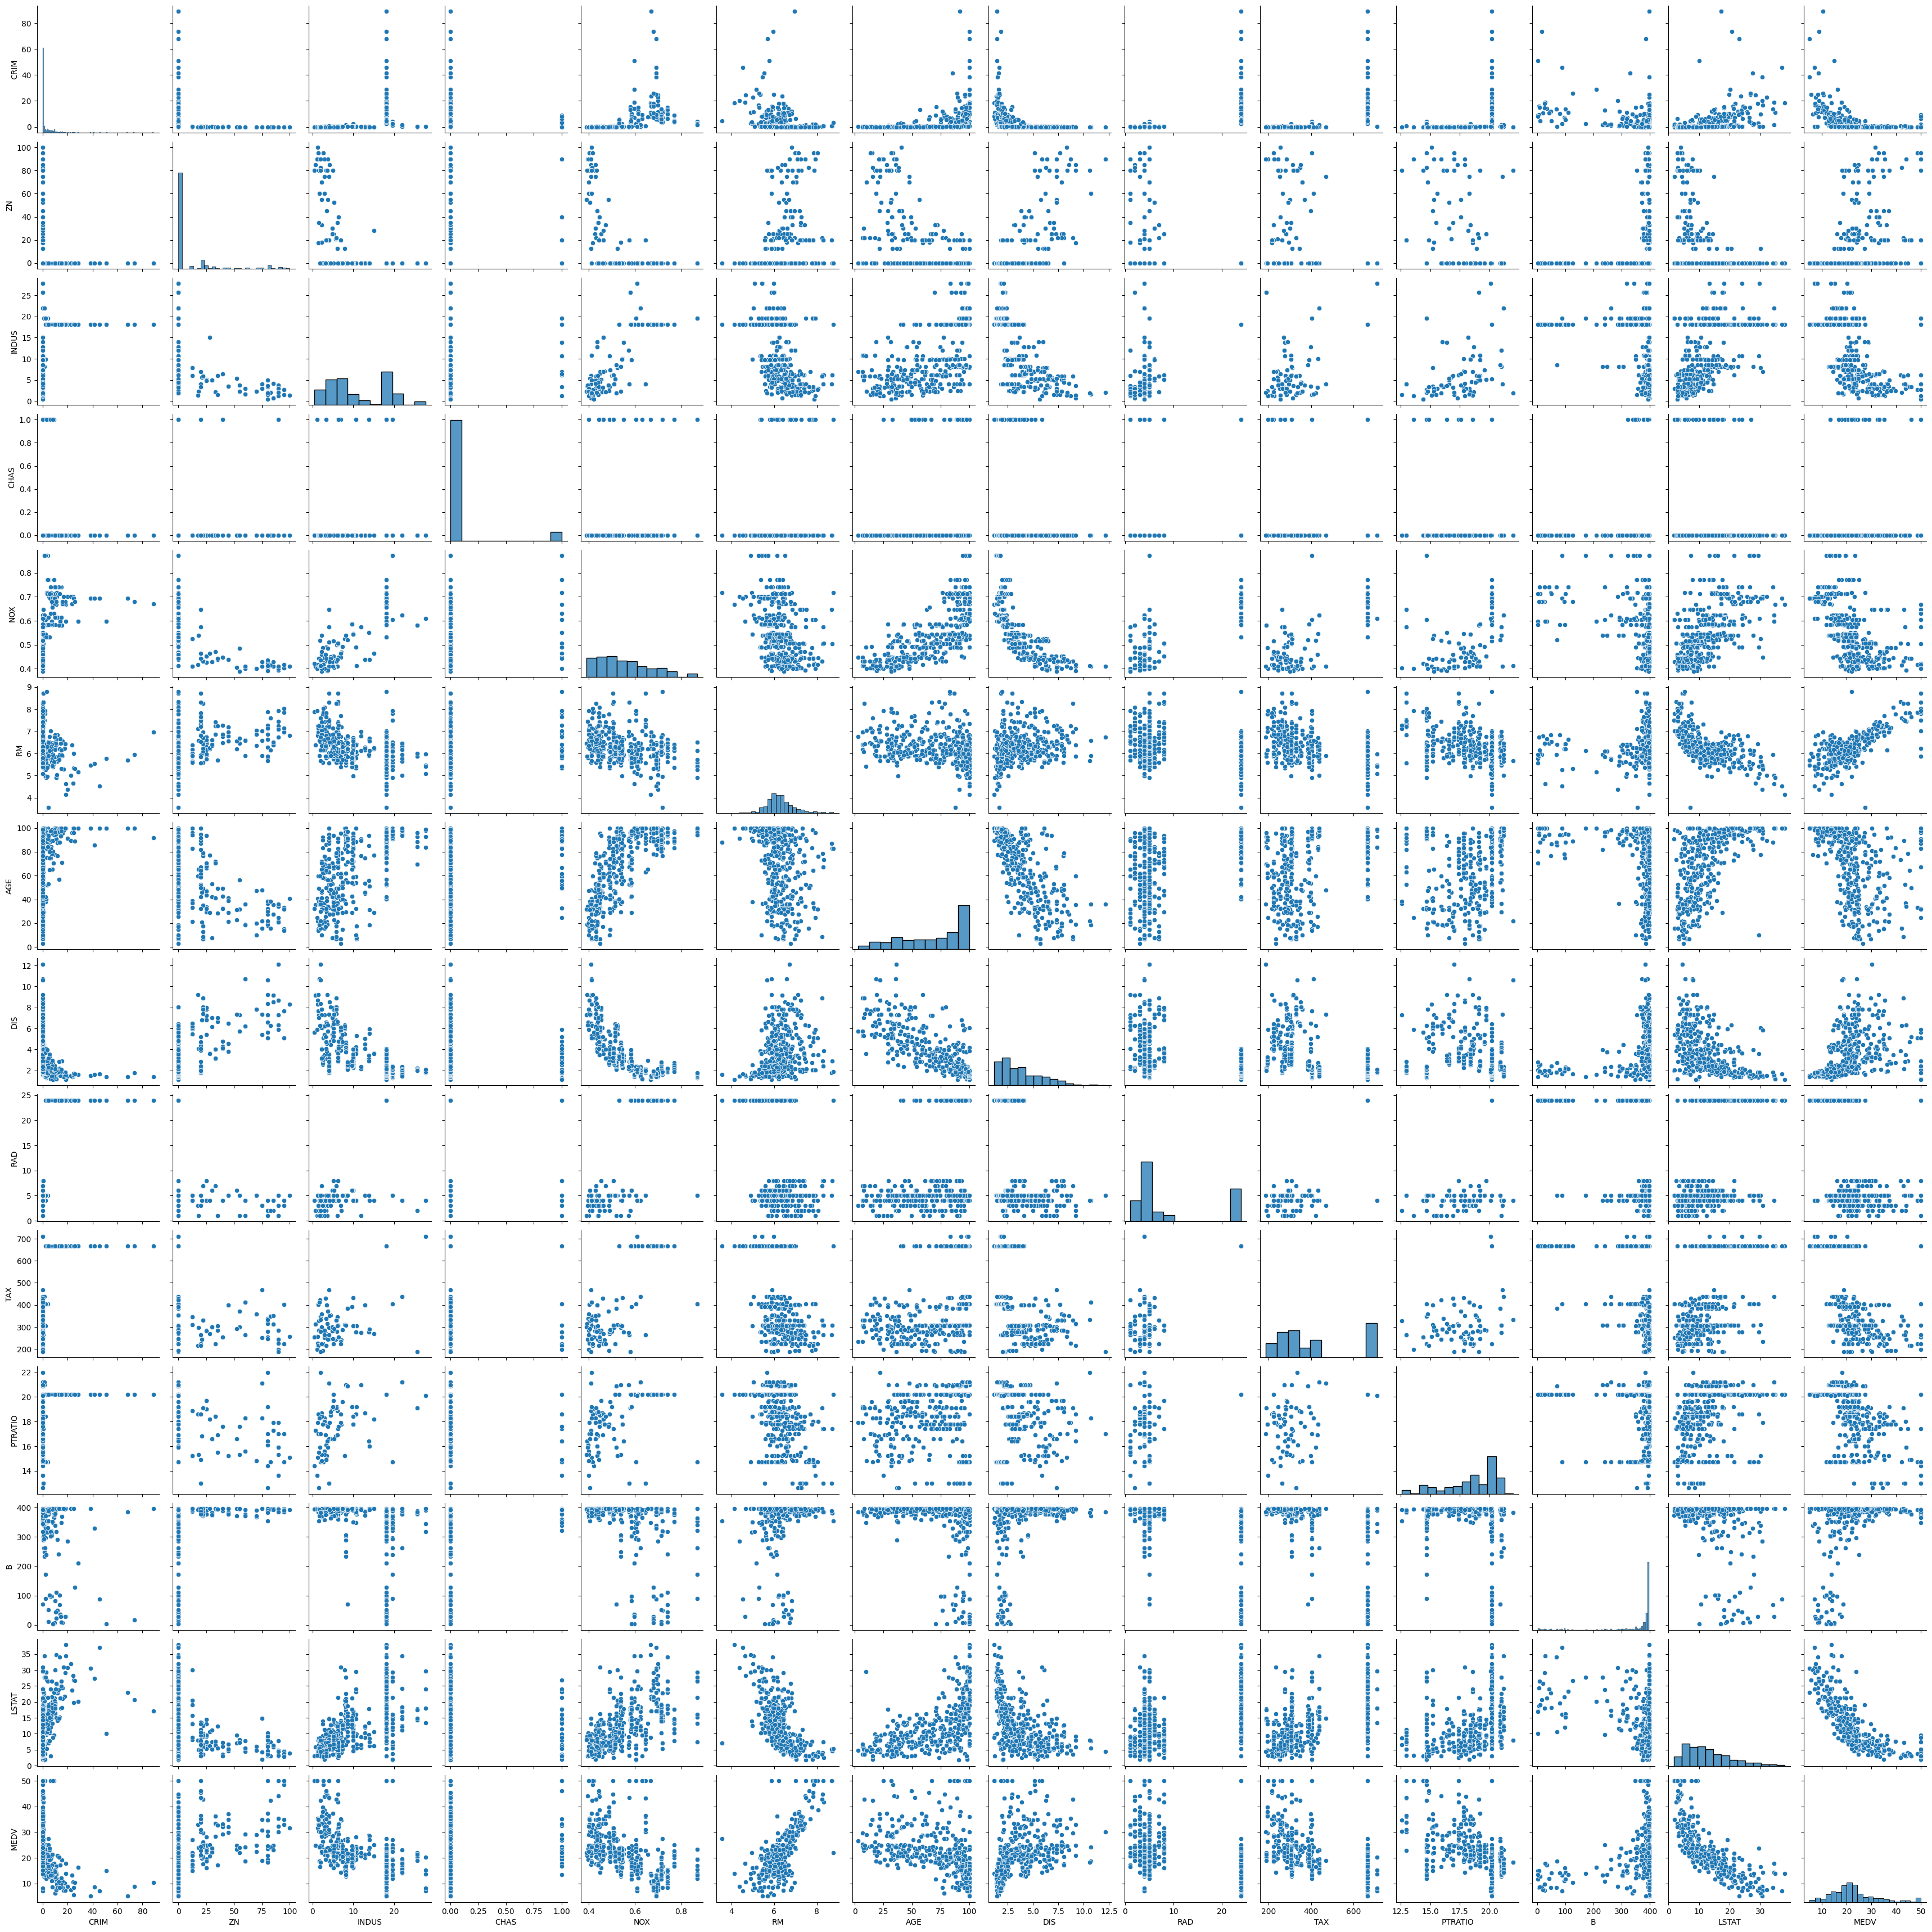

In [ ]:
sns.pairplot(data)

# **Data Visualization through Scatterplot**

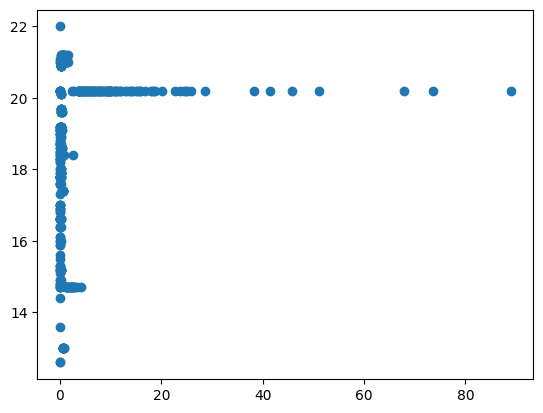

In [ ]:
plt.scatter(data['CRIM'], data['PTRATIO'])

<Axes: xlabel='CRIM', ylabel='PTRATIO'>

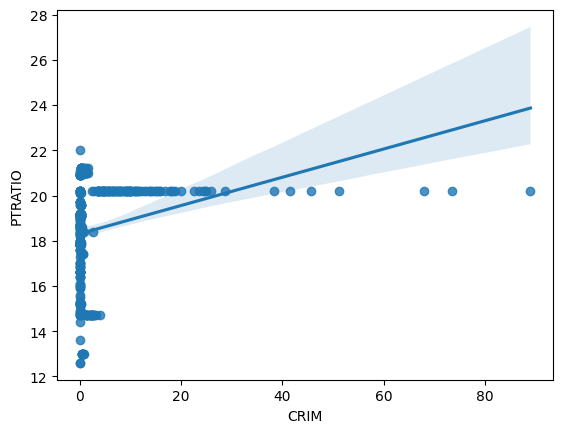

In [ ]:
sns.regplot(x='CRIM', y='PTRATIO', data=data)

# **Store Feature Matrix In X And Response (Target) In Vector y**

In [ ]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]

# **Display Top 5 Rows of X**

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


# **Display the Vector y**

In [ ]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7
...,...
499,17.5
500,16.8
502,20.6
503,23.9


# **Splitting the Dataset Into The Train Set And Test Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Display X_train**

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


# **Display X_test**

In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,377.68,5.10


# **Standard Scaler**

In [ ]:
scaler= StandardScaler()

**Fitting the Model**

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test= scaler.transform(X_test)

# **Display X_train**

In [ ]:
X_train

array([[-0.3272605 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.40288864,  0.11593724],
       [ 0.04316861, -0.48865541,  1.04820426, ...,  0.75829743,
        -3.55599998,  0.81143377],
       [-0.3349325 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.35532602, -0.02235647],
       ...,
       [-0.40693189, -0.48865541, -0.97303729, ...,  0.1053238 ,
         0.3314929 , -0.32713969],
       [ 0.49545863, -0.48865541,  1.04820426, ...,  0.75829743,
         0.44817157,  0.69327992],
       [-0.40092822, -0.48865541,  2.16128768, ...,  0.24524672,
         0.25325809,  0.66642677]])

# **Display X_test**

In [ ]:
X_test

array([[-0.40716288,  0.69773799,  0.59707376, ..., -0.17452204,
         0.4422651 , -0.90716768],
       [-0.40292265,  2.05361617, -1.37109361, ..., -0.12788107,
         0.4008162 , -0.69502782],
       [-0.36380757, -0.48865541, -0.16070753, ..., -0.0812401 ,
         0.44122888, -0.03175507],
       ...,
       [-0.39232937, -0.48865541, -0.53222677, ...,  0.47845159,
         0.44817157, -0.8185523 ],
       [-0.40115241,  1.41804828, -1.11309414, ..., -1.57375126,
         0.24900958, -1.05620265],
       [-0.29417529, -0.48865541,  1.60695739, ...,  1.22470717,
         0.44817157, -0.09485996]])

# **Model Training**

# **Linear Regression**

In [ ]:
regression= LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[-1.16422484  1.06108499  0.39032387  0.29209079 -1.99660097  2.919107
 -0.56678274 -2.98589329  2.41887408 -2.87948075 -1.92242361  0.87551786
 -2.71551439]


In [ ]:
print(regression.intercept_)

21.872363636363634


In [ ]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
reg_pred = regression.predict(X_test)

In [ ]:
reg_pred

array([29.48758967, 16.89843072, 21.88395113, 30.03140416, 18.33998157,
       34.41717332, 22.29567579, 30.18541478, 32.68800811, 15.15148614,
       22.00937236, 40.89756783, 21.39760824, 16.631487  , 18.56021823,
       20.16135634, 17.03230083, 15.23458095, 22.21007405, 14.03864948,
       18.38308584, 20.31978106, 16.70540425, 29.04732153, 25.84896274,
       16.21750987, 26.91521769, 31.48625718, 23.80195772, 26.88649048,
       40.79205858, 17.93939578, 21.74000234, 17.0218407 , 17.45215081,
       20.87478891, 22.15708989, 21.38558618, 23.05850448, 21.06608939,
       27.72449001, 34.81400202, 21.78651421, 30.44288708, 34.59722541,
       19.75813031, 24.68728038, 10.22457273, 19.81849411, 25.15817576,
       21.82205121, 25.58520471, 14.76531893, 18.31754995, 18.17045495,
       23.96198129, 43.37418034, 22.39050206, 15.68056608, 23.22677962,
       20.98939499, 21.55059106, 14.59407927, 28.87042011, -3.45096729,
       32.51557282, 16.5500498 , 31.10947226, 24.8731608 , 20.17

# **Assumptions**

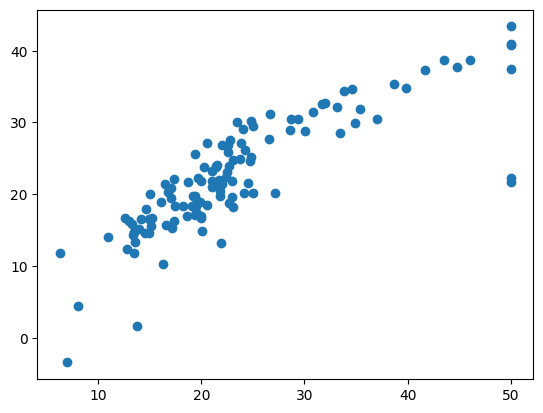

In [ ]:
plt.scatter(y_test, reg_pred)

In [ ]:
residuals = y_test-reg_pred

In [ ]:
residuals

,MEDV
93,-4.487590
352,1.701569
319,-0.883951
65,-6.531404
499,-0.839982
...,...
358,3.929978
457,1.646164
321,-1.638334
190,6.555052


# **Data Visualization through Kernel Density Estimate**

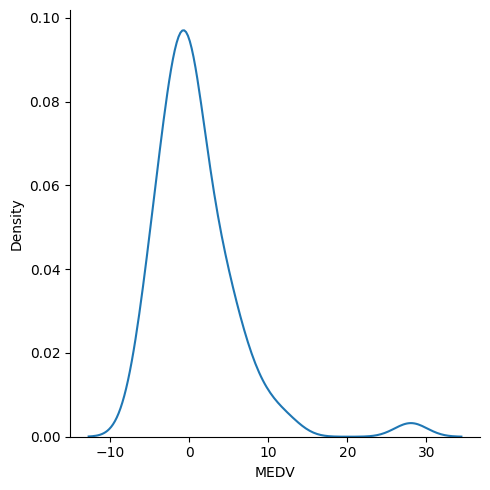

In [ ]:
sns.displot(residuals, kind='kde')

**Scatter plot with respect to prediction and residuals**

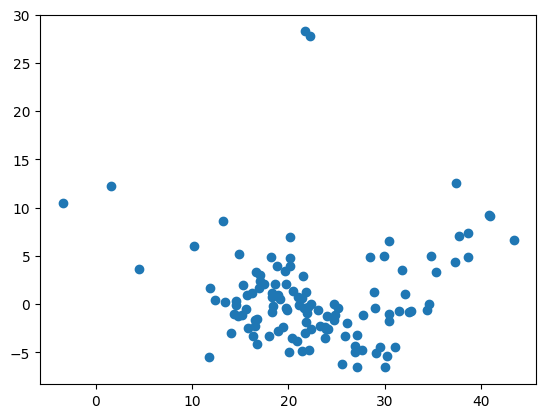

In [ ]:
plt.scatter(reg_pred,residuals)

In [ ]:
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

28.870771928253443
3.4558210072479936
5.373152885248422


# **R square and adjusted R square**

In [ ]:
score = r2_score(y_test, reg_pred)
print(score)

0.6905175764205996


**Display adjusted R_squared**

In [ ]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6522007049298166

# **Pickling the Model file for Deployment**

In [ ]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [ ]:
pickled_model.predict(scaler.transform(X_train))

array([ 31.98276903,   7.6029453 ,  35.04947848, -17.89068466,
         6.67843243,  49.39985354,  59.96328775,  51.43783359,
        33.04089525,  57.24887323,  16.7734886 ,  30.38648236,
        39.11727373, -16.94725461,  28.63231687,  60.4095123 ,
        36.44352955,  39.12855767,   3.34754431,  47.26181688,
        -6.97998368,  43.14459754,  55.61691678,  12.42937028,
        50.24216759,  18.79602202,  18.10182327,  43.18676678,
        32.30054718,  -3.94423049,  16.23649035,  31.71713842,
        26.25910766,  27.07371129,  48.71967217,  54.47127573,
        51.34319286,  15.38246062,  48.6154851 ,  20.0322737 ,
        17.81261785,  35.1588475 ,  30.95038136,  49.45969091,
         9.38043257,  39.04221235,  51.12195832, -16.79978344,
        32.70959012,  44.67281673,   7.2068979 ,  33.65371761,
        57.7297668 ,  53.05160343,  32.02526219,  46.43092693,
        48.29457918, -15.95882251,  53.84728801,  30.23116505,
         7.01964667,  36.16452485,  10.73454622,  27.26

# **Conclusion**

**So from this dataset we perform various data analysis algorithm as above mentioned.Firstly, we load our dataset then analysis that dataset by checking the number columns and rows, descriptive statictics, checking the duplicate values and then removing that. We also do data visualization as above mentioned. Then we split that dataset into train data and test date as we also use various metrics like mean_squared error, mean_absolute_error.**